# IDA - Customer Churn Prediction

#### This dataset contains 7043 observations (i.e. customers) and 21 features that can be broken down into three categories:
    1) Demographics
    2) Account information
    3) Payment information.
#### Our target feature is the “Churn” column, which indicates whether a customer has terminated service (“churned customer”) or is still with the company (“existing customer”).

In [183]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import scipy.stats as sci
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings=('ignore')

In [90]:
#Loading data
df=pd.read_csv("TelcoCustomerChurn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,...,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,...,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,...,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,...,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0


In [91]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [92]:
print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))

Number of rows: 4718, number of columns: 31


In [185]:
#Handling data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              4718 non-null   float64
 1   Country            4718 non-null   int32  
 2   State              4718 non-null   int32  
 3   City               4688 non-null   object 
 4   Zip Code           4698 non-null   float64
 5   Latitude           4695 non-null   float64
 6   Longitude          4685 non-null   float64
 7   Gender             4718 non-null   int8   
 8   Senior Citizen     4718 non-null   int32  
 9   Partner            4718 non-null   int32  
 10  Dependents         4718 non-null   int32  
 11  Tenure Months      4718 non-null   float64
 12  Phone Service      4718 non-null   int32  
 13  Multiple Lines     4718 non-null   object 
 14  Internet Service   4718 non-null   object 
 15  Online Security    4718 non-null   object 
 16  Online Backup      4718 

## Missing values

In [197]:
print("Missing values (per feature): \n{}\n".format(df.isnull().sum()))

Missing values (per feature): 
Count                   0
Country                 0
State                   0
City                   30
Zip Code               20
Latitude               23
Longitude              33
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
CLTV                    0
Churn Reason         3457
Churn Value             0
geometry                0
dtype: int64



In [94]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors="coerce")
df.drop(['CustomerID','Lat Long'],axis=1,inplace=True)

In [95]:
na_cols = df.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in df.columns[~df.columns.isin(['City','Churn Reason','Zip Code','Latitude','Longitude'])]:
    if col in na_cols:
        if df[col].dtype != 'object':
            df[col] =  df[col].fillna(df[col].mean()).round(0)
        if df[col].dtype == 'object':
            df[col] =  df[col].fillna(df[col].mode()[0])

In [96]:
#Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

8 columns were label encoded.


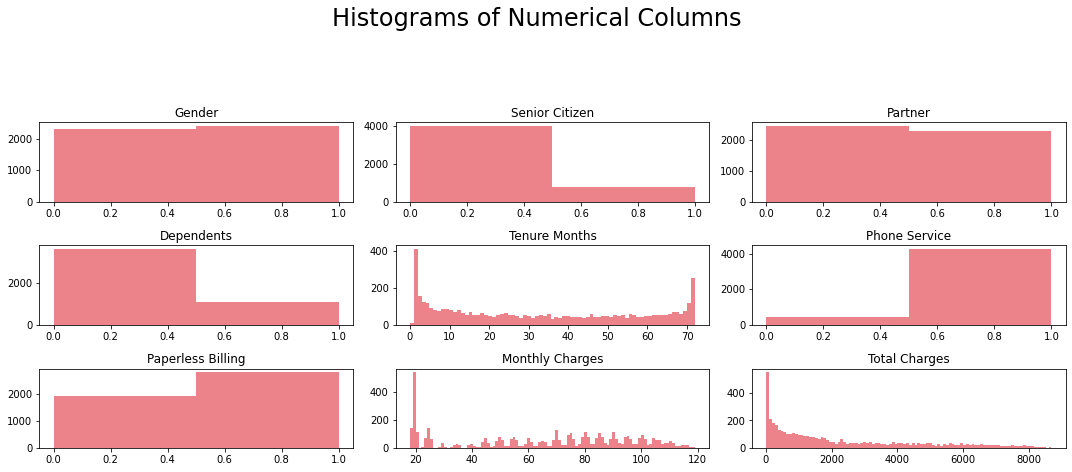

In [97]:
df1 = df[['Gender', 
'Senior Citizen', 'Partner','Dependents',
'Tenure Months', 'Phone Service', 'Paperless Billing',
'Monthly Charges', 'Total Charges']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(df1.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df1.columns.values[i])
    vals = np.size(df1.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df1.iloc[:, i], bins=vals, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Numerical Statistics

In [98]:
stat_num_df=df.loc[:,['Tenure Months','Monthly Charges','Total Charges','CLTV']]

In [99]:
def custom_summary(data):
    result=[] # This is an empty list to store the iterated result of stats
    for col in data.columns:
        if data[col].dtype!= 'O' and data[col].dtype!='str':
            stats=OrderedDict({'Feature_name':col,
                               'Count':data[col].count(),
                               'Minimum':round(data[col].min(),2),
                               'Quartile 1':round(data[col].quantile(0.25),2),
                               'Mean':round(data[col].mean(),2),
                               #'Median':round(data[col].median(),2),
                               'Mode':round(data[col].mode(),2),
                               'Quartile 3':round(data[col].quantile(0.75),2),
                               'IQR':round(data[col].quantile(0.75),2)-round(data[col].quantile(0.25),2),
                               'Maximum':round(data[col].max(),2),
                               'Variance':round(data[col].var(),2),
                               'SD':round(data[col].std(),2),
                               'Kurtosis':round(data[col].kurt(),0),
                               'Skewness':round(data[col].skew(),2)
                               
                              })
            result.append(stats)
                        
#     # Skewness comments
    
    
            if stats['Skewness'] < -1:
                skewtype='Highly Negatively Skewed'
            elif -1<stats['Skewness']<-0.5:
                skewtype='Moderately Negatively Skewed'
            elif -0.5<stats['Skewness']<0:
                skewtype="Fairly symmetric but Negative"
            elif 0<stats['Skewness']<0.5:
                skewtype="Fairly Symmetric but positive"
            elif 0.5<stats['Skewness']<1:
                skewtype='Moderately Positively Skewed'
            elif stats['Skewness']>1:
                skewtype='Highly Positively Skewed'
            else:
                skewtype='Error'
            stats['Skewtype']=skewtype
    
#     #Outlier comments ---||An outlier is a data point that lies outside the overall pattern in a distribution||---
    
            up=stats['Quartile 3']+1.5*stats['IQR']
            low=stats['Quartile 1']-1.5*stats['IQR']
            if len([x for x in data[col] if x < low or x > up]) > 0:
                outlier_comment='Has Outliers'
            else:
                outlier_comment='Has No Outliers'
            stats['Outlier_Comments']=outlier_comment
    
#     #Condition to type of Kurtosis
        
            if stats['Kurtosis']==0:
                Kurtype='Mesokurtic'
            elif stats['Kurtosis']>0:
                Kurtype='Leptokurtic'
            else:
                Kurtype='Platikurtic'
            stats['Kurtype']=Kurtype
            
              
       
    result_df=pd.DataFrame(data=result)
    return result_df

In [100]:
custom_summary(stat_num_df).T

,0,1,2,3
Feature_name,Tenure Months,Monthly Charges,Total Charges,CLTV
Count,4718,4718,4718,4718
Minimum,0.0,18.0,19.0,2003.0
Quartile 1,9.0,36.0,415.0,3491.25
Mean,32.73,64.88,2311.05,4406.64
Mode,0 1.0 dtype: float64,0 20.0 dtype: float64,0 20.0 dtype: float64,0 4407.0 dtype: float64
Quartile 3,56.0,90.0,3869.0,5395.75
IQR,47.0,54.0,3454.0,1904.5
Maximum,72.0,119.0,8685.0,6499.0
Variance,603.61,907.9,5178146.49,1402778.51


### Revenue sources

In [144]:
revenue_services = []
revenue_services_labels = []

# Phone service only customers
revenue_services.append(df[(df["Internet Service"] == "No") & (df["Phone Service"] == 1)]["Total Charges"].sum())
revenue_services_labels.append("Phone Only")

# Internet service only customers
revenue_services.append(df[(df["Internet Service"] != "No") & (df["Phone Service"] == 0)]["Total Charges"].sum())
revenue_services_labels.append("Internet Only")

# Phone  and Internet customers
revenue_services.append(df[(df["Internet Service"] != "No") & (df["Phone Service"] == 1)]["Total Charges"].sum())
revenue_services_labels.append("Phone and Internet")

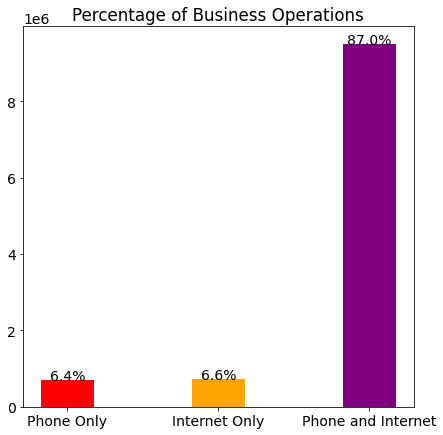

In [169]:
fig,ax = plt.subplots(figsize=(7,7))
colors_list = ['Red', 'Orange', 'Purple']
pps=ax.bar(revenue_services_labels,revenue_services,color=colors_list,width=0.35, align='center')
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,s='{:.1f}%'.format(100 * p.get_height()/sum(revenue_services)),ha='center')
plt.title('Percentage of Business Operations')
plt.show()

## Churn rate by Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

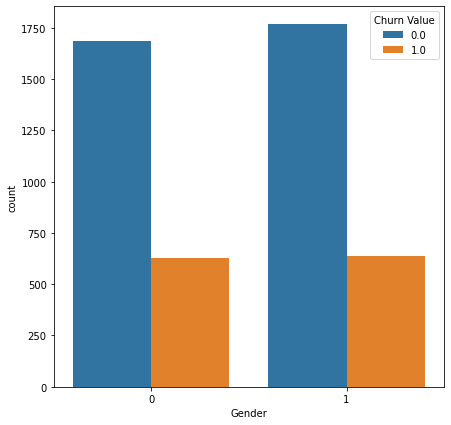

In [200]:
# Creating plots
df['Gender']=df['Gender'].astype('category').cat.codes
fig = plt.figure(figsize =(7,7))
sns.countplot(x=df['Gender'],hue=df['Churn Value'])

## Churn rate by Senior Citizen

<AxesSubplot:xlabel='Senior Citizen', ylabel='count'>

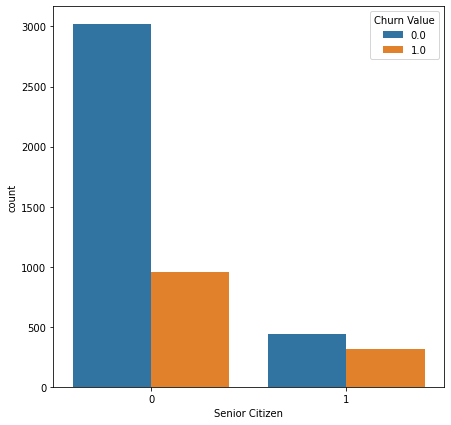

In [199]:
fig = plt.figure(figsize =(7, 7))
sns.countplot(data=df,x='Senior Citizen', hue='Churn Value')

## Churning effect because of monthly charges

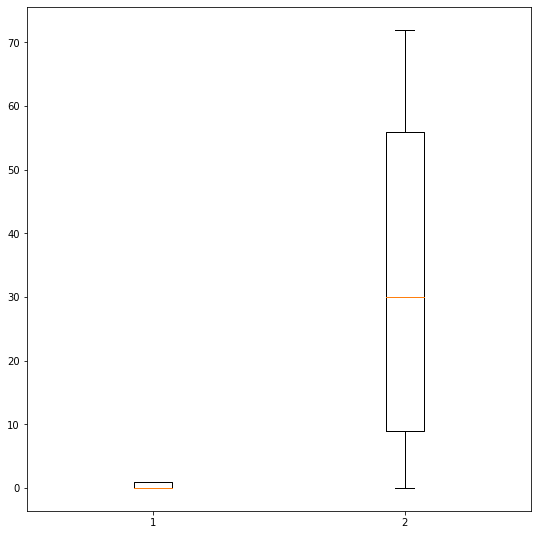

In [198]:
fig = plt.figure(figsize =(7, 7))
ax = fig.add_axes([0, 0,1,1])
a=df['Churn Value']
b=df['Tenure Months']
data=[a,b]
bp = ax.boxplot(data)
plt.show()

## Demographics of internet service by State

In [193]:
import geopandas as gpd
import plotly.express as px
import descartes
from shapely.geometry import Point, Polygon

In [194]:
geometry=[Point(xy) for xy in zip(df["Longitude"],df["Latitude"])]
crs={'init':'epsg:4326'}

In [195]:
geo_df=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


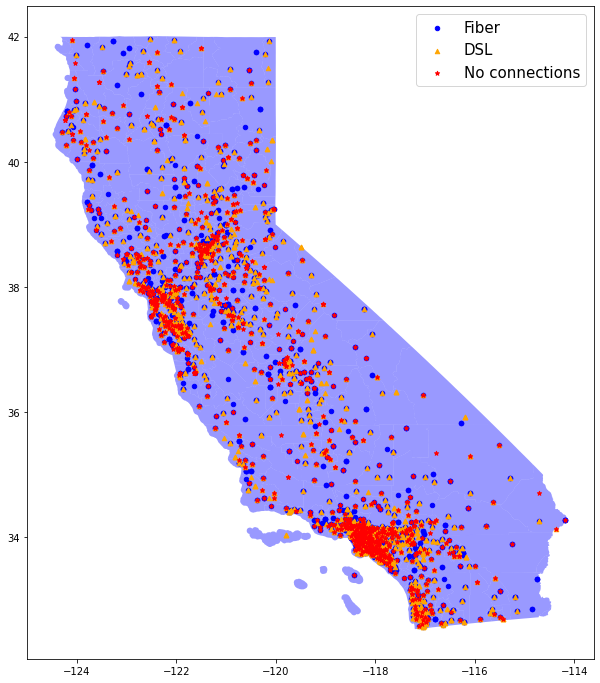

In [196]:
street_map=gpd.read_file('C:/Users/USER/ML Working/Cutomer Churn Project/tl_2016_06_cousub.shp')
fig,ax=plt.subplots(figsize=(12,12))
street_map.plot(ax=ax, alpha=0.4, color="blue")
geo_df[geo_df['Internet Service']=="Fiber optic"].plot(ax=ax,markersize=20,color="blue",marker="o",label="Fiber")
geo_df[geo_df['Internet Service']=="DSL"].plot(ax=ax,markersize=20,color="orange",marker="^",label="DSL")
geo_df[geo_df['Internet Service']=="No"].plot(ax=ax,markersize=20,color="red",marker="*",label="No connections")
ax.legend(prop={'size': 15})

## Customer Lifespan

In [212]:
def display_percent(plot, feature, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 8, ha="center")
    plt.show()

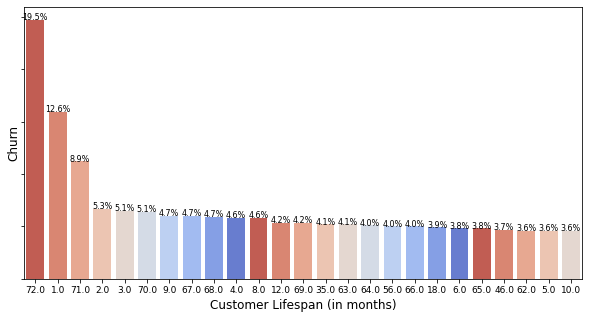

In [215]:
p = sns.color_palette("coolwarm", 10)
p.reverse()

df_top_churn = pd.DataFrame(df[df['Churn Value'] == 0.00 ]['Tenure Months'].value_counts().sort_values(ascending=False))
total_churn = df[df['Churn Value'] == 1].shape[0]

fig, ax = plt.subplots(figsize=(10,5))
sns_lifespan = sns.barplot( x = df_top_churn[:10].index, y = df_top_churn[:10]["Tenure Months"], ax=ax, palette=p, order=df_top_churn[:10].index)
plt.xticks(size=9)
plt.xlabel('Customer Lifespan (in months)', size=12)
plt.yticks(size=9)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=False)

display_percent(ax, df_top_churn, total_churn)